<a href="https://colab.research.google.com/github/fajrunwm/bsd_network/blob/main/BSD_road_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BSD Network Analysis

-----------------------------------

Network Analysis in BSD
-------------------------------

Note: Adapted from GEOG0051 UCL Geography 2024. Contributors: Stephen Law, Mateo Neira, Nikki Tanu, Thomas Keel, Gong Jie, Jason Tang, Igor Tkalac and Demin Hu.

## Introduction

This study aims to conduct a street network analysis of cafes near BSD area in South Tangerang, Indonesia within a radius of ...... metres. By calculating the closeness and betweenness centrality, a visual interpretation is then performed to review the relationship between the distribution of cafes and networks, whether they are aligned or not.

## Dataset and Neighbourhood

The dataset is derived from OSM using OSMnx towards the walk route. The study area is a learning environment, assuming people walk from campus to nearby places, such as cafes or stations. .............. is chosen as the starting point, being located near several stations.

# Preparation

## GPU checking

In [ ]:
# Verify GPU Availability
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
# Install Necessary Libraries
#!pip install tensorflow
#!pip install torch


In [ ]:
# Use GPU in Your Code
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cuda


## Import Libraries

In [ ]:
# Install necessary packages
!pip install osmnx
!pip install contextily
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 15.5 MB/s eta 0:00:00


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox        # this line imports osmnx
import networkx as nx     # this line imports networkx
import matplotlib.cm as cm
import matplotlib.colors as colors
import contextily as ctx

## Defining study area

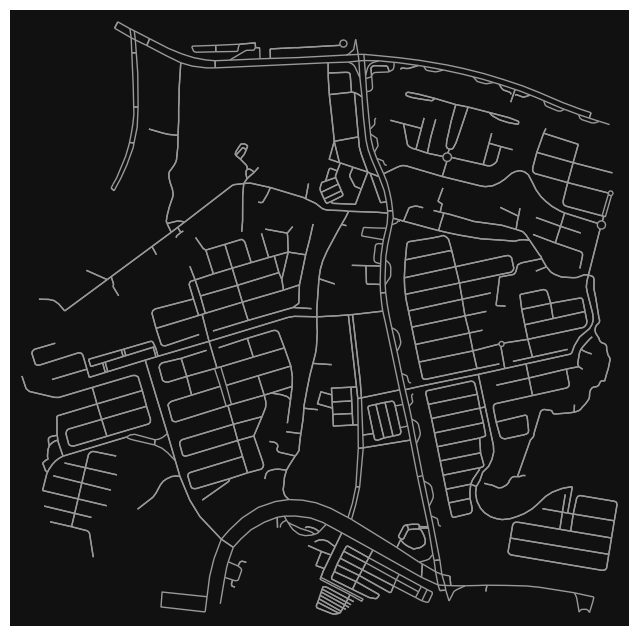

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [ ]:
# defining networks of BSD with radius of .......... metres
#G = ox.graph_from_point((-6.315650, 106.652754), dist=750, network_type='all')
G = ox.graph_from_point((-6.292782, 106.638087), dist=750, network_type='all')

# Plot the road network graph
ox.plot_graph(G, node_size=0)

# Network Analysis

#### Closeness Centrality

In [ ]:
# some of the centrality measures are not implemented on multiGraph so first set as diGraph
DG = ox.convert.to_digraph(G)

In [ ]:
# calculate its edge closeness centrality: convert graph into a line graph so edges become nodes and vice versa
edge_cc = nx.closeness_centrality(nx.line_graph(DG))

# after this it need to first set the attributes back to its edge
nx.set_edge_attributes(DG, edge_cc,'cc')

# and turn back to multiGraph for plotting
G = nx.MultiGraph(DG)

# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

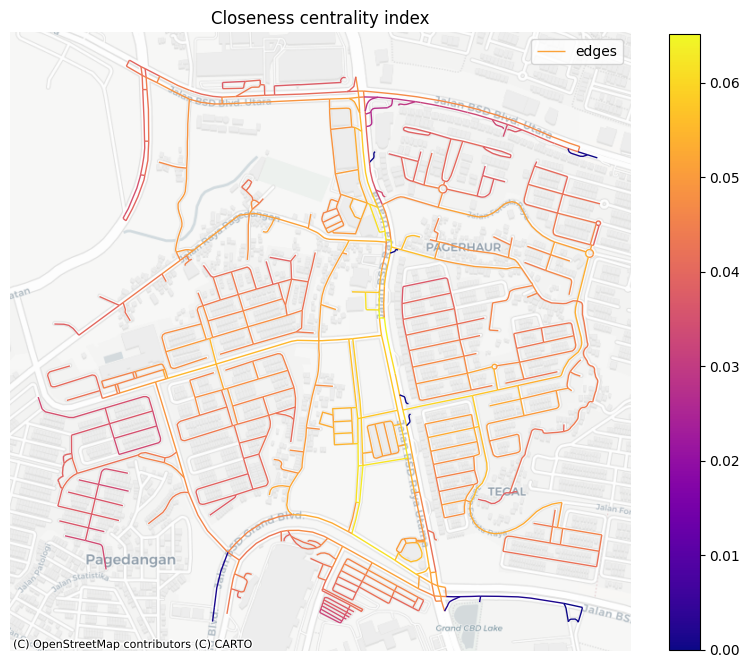

In [ ]:
# Plot the cafes and edges
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the edges according to closeness centrality
gdf_edges.plot(ax=ax, column='cc', cmap='plasma', label='edges', linewidth=1, legend=True, legend_kwds={'shrink': 0.8})

# Add basemap from CartoDB.Positron
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.axis('off')
plt.title('Closeness centrality index')
plt.legend()
plt.show()

#### Betweenness Centrality

In [ ]:
# similarly, let's calculate edge betweenness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_bc = nx.betweenness_centrality(nx.line_graph(DG))

# after this it need to first set the attributes back to its edge
nx.set_edge_attributes(DG,edge_bc,'bc')

# and turn back to multiGraph for plotting
G = nx.MultiGraph(DG)

# convert graph to geopandas dataframe
gdf_edges = ox.graph_to_gdfs(G,nodes=False,fill_edge_geometry=True)

# set crs to 3857 (needed for contextily)
gdf_edges = gdf_edges.to_crs(epsg=3857) # setting crs to 3857

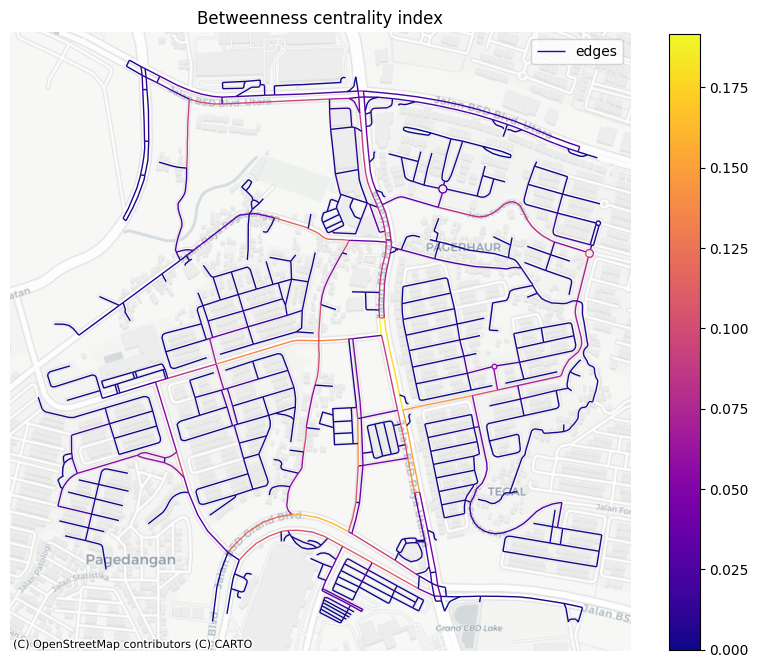

In [ ]:
# Plot the cafes and edges
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the edges according to betweenness centrality
gdf_edges.plot(ax=ax, column='bc', cmap='plasma', label='edges', linewidth=1, legend=True, legend_kwds={'shrink': 0.8})

# Add basemap from CartoDB.Positron
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

ax.axis('off')
plt.title('Betweenness centrality index')
plt.legend()
plt.show()

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Save the result into CSV
gdf_edges.to_csv('BSD_Networks_Analysis.csv', index=False)

#### Shortest Path

In [ ]:
# shortest path
#origin_point = ox.geocode('Oxford Circus, London')
#destination_point = ox.geocode('Euston Station, London')

#origin_node = ox.nearest_nodes(G, origin_point[1], origin_point[0])
#destination_node = ox.nearest_nodes(G, destination_point[1], destination_point[0])
#origin_node, destination_node

#route = nx.shortest_path(G, origin_node, destination_node, weight='length')
#str(route)

#fig,ax = ox.plot_graph_route(G, route)

## Discussion

The analysis of closeness and betweenness centrality provides valuable insights into the spatial structure and connectivity within the study area. Along ........... Street, the highest closeness centrality score indicates excellent accessibility and connectivity to the entire edge of the study area. It suggests that the node is well-connected to various destinations and easily reachable from different parts of the neighbourhood. Despite having the highest closeness centrality, this road is not the densest location of cafes.

Meanwhile, the highest betweenness centrality lies on ........ edges, such as ........ Street and ........... Street, indicating that these streets play a critical role in connecting different parts of the network. However, it may experience heavy traffic and serve as a major thoroughfare, potentially requiring improvement for pedestrian enjoyment. It may have a different pattern in terms of ........ concentration, indicating that such streets might not be popular among ................

The shortest path from ........... to ............. offers the most effortless pedestrian route in terms of distance, passing several cafes along the route. However, it is technically difficult to visualise the shortest path and cafe spots on the same canvas.
